<a href="https://colab.research.google.com/github/dpierso1/Pierson_IT533/blob/main/Week_5_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy import spatial
import statsmodels.api as sm
from statsmodels.formula.api import ols 
from sklearn import linear_model  
from sklearn.linear_model import LogisticRegression 
airline = pd.read_csv("https://raw.githubusercontent.com/dpierso1/Pierson_IT533/main/airline_passenger_satisfaction.csv", encoding="ISO-8859-1")
airline.dropna(inplace=True)

In [19]:
airline.head()

,ID,Gender,Age,CustomerType,TypeOfTravel,Class,FlightDistance,DepartureDelay,ArrivalDelay,EaseOfOnlineBooking,...,On-boardService,SeatComfort,LegRoom,Cleanliness,FoodAndDrink,In-flightWifi,In-flightEntertainment,BaggageHandling,PriceUSD,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,3,5,5,1053.59,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,2,5,5,1051.94,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,4,3,3,1627.35,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,2,5,5,2520.45,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,6048.50,Satisfied


Question 2.

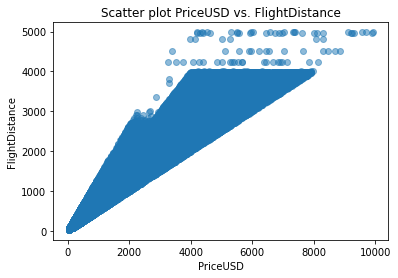

In [20]:
plt.scatter(airline['PriceUSD'], airline['FlightDistance'], alpha=0.5)
plt.title('Scatter plot PriceUSD vs. FlightDistance')
plt.xlabel('PriceUSD')
plt.ylabel('FlightDistance')
plt.show()

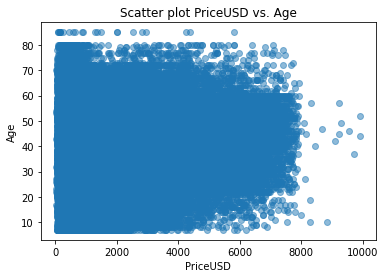

In [21]:
plt.scatter(airline['PriceUSD'], airline['Age'], alpha=0.5)
plt.title('Scatter plot PriceUSD vs. Age')
plt.xlabel('PriceUSD')
plt.ylabel('Age')
plt.show()

Question 3.

In [22]:
corr = airline.corr()
corr

,ID,Age,FlightDistance,DepartureDelay,ArrivalDelay,EaseOfOnlineBooking,Check-inService,OnlineBoarding,On-boardService,SeatComfort,LegRoom,Cleanliness,FoodAndDrink,In-flightWifi,In-flightEntertainment,BaggageHandling,PriceUSD
ID,1.000000,0.021235,0.085331,-0.010855,-0.030212,0.013451,0.081642,0.055943,0.057362,0.054199,0.043938,0.025352,-0.000269,-0.023177,0.002497,0.075873,0.081999
Age,0.021235,1.000000,0.099772,-0.009300,-0.011187,0.022202,0.032150,0.206672,0.057004,0.158386,0.039411,0.051818,0.023360,0.015794,0.074548,-0.048266,0.105367
FlightDistance,0.085331,0.099772,1.000000,0.003566,-0.000547,0.065925,0.072842,0.215510,0.111520,0.156995,0.134080,0.094741,0.056957,0.006692,0.131042,0.064348,0.954738
DepartureDelay,-0.010855,-0.009300,0.003566,1.000000,0.965367,-0.004549,-0.017898,-0.018290,-0.030700,-0.027155,0.014818,-0.014007,-0.029587,-0.015880,-0.027623,-0.004157,0.003105
ArrivalDelay,-0.030212,-0.011187,-0.000547,0.965367,1.000000,-0.006252,-0.020966,-0.021662,-0.034914,-0.029875,0.011836,-0.015974,-0.032066,-0.017586,-0.030635,-0.007769,-0.000667
EaseOfOnlineBooking,0.013451,0.022202,0.065925,-0.004549,-0.006252,1.000000,0.007757,0.405063,0.038627,0.028639,0.108742,0.015475,0.030365,0.713698,0.047043,0.038777,0.066556
Check-inService,0.081642,0.032150,0.072842,-0.017898,-0.020966,0.007757,1.000000,0.200711,0.243894,0.187343,0.151413,0.174599,0.083863,0.042650,0.118485,0.233842,0.079115
OnlineBoarding,0.055943,0.206672,0.215510,-0.018290,-0.021662,0.405063,0.200711,1.000000,0.152396,0.417810,0.120988,0.328538,0.233886,0.457595,0.283565,0.081288,0.223417
On-boardService,0.057362,0.057004,0.111520,-0.030700,-0.034914,0.038627,0.243894,0.152396,1.000000,0.129141,0.357457,0.120432,0.056892,0.119856,0.418333,0.519462,0.120269
SeatComfort,0.054199,0.158386,0.156995,-0.027155,-0.029875,0.028639,0.187343,0.417810,0.129141,1.000000,0.102399,0.678465,0.576140,0.122011,0.611609,0.072906,0.164278


Explanation: The biggest and most obvious correlation is between flight distance and price which makes sense being the further you travel the more expensive the plane ticket. The next being online boarding with price which makes somewhat sense as the ability access online capabilities through the airline company may indicate a more expensive fare. Then finally it would be seat comfort. The more comfortable the ride the higher the cost. Online boarding and seat comfort do have a strong correlation as with between the two and when these two predicator variables are correlated it is called multicollinearity. 

Question 4: Selected dependent variable is Food and Drink.
The most important indepenent variable towards food and drink is cleanliness .

In [23]:
X = airline['Cleanliness']
y = airline['FoodAndDrink']
X = sm.add_constant(X)
airline.mod1 = sm.OLS(y, X).fit()  ## sm.OLS(output, i.e. dependent variable, input, i.e. independent variable)
airline.mod1_summary = airline.mod1.summary()
print(airline.mod1_summary)

                            OLS Regression Results                            
Dep. Variable:           FoodAndDrink   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                 9.619e+04
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:06:07   Log-Likelihood:            -1.7861e+05
No. Observations:              125743   AIC:                         3.572e+05
Df Residuals:                  125741   BIC:                         3.572e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.0141      0.008    133.324      

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


With a P>|T| value of 0 it is to determine that the two variables are dependent on one another but with an R squared percentage of 43 percent this is not a great variable to predict future values involving this variable.

Question 5.

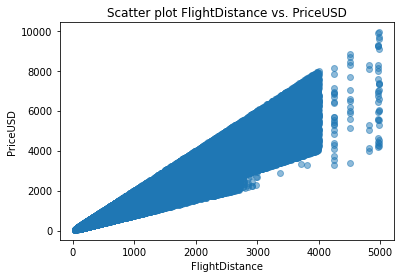

In [24]:
plt.scatter(airline['FlightDistance'], airline['PriceUSD'], alpha=0.5)
plt.title('Scatter plot FlightDistance vs. PriceUSD')
plt.xlabel('FlightDistance')
plt.ylabel('PriceUSD')
plt.show()

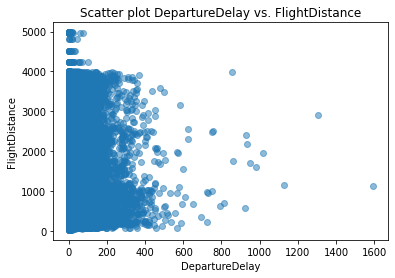

In [25]:
plt.scatter(airline['DepartureDelay'], airline['FlightDistance'], alpha=0.5)
plt.title('Scatter plot DepartureDelay vs. FlightDistance')
plt.xlabel('DepartureDelay')
plt.ylabel('FlightDistance')
plt.show()

In [26]:
X = airline['DepartureDelay']
y = airline['ArrivalDelay']
X = sm.add_constant(X)
airline.mod1 = sm.OLS(y, X).fit()  ## sm.OLS(output, i.e. dependent variable, input, i.e. independent variable)
airline.mod1_summary = airline.mod1.summary()
print(airline.mod1_summary)

                            OLS Regression Results                            
Dep. Variable:           ArrivalDelay   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 1.722e+06
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:06:11   Log-Likelihood:            -4.6925e+05
No. Observations:              125743   AIC:                         9.385e+05
Df Residuals:                  125741   BIC:                         9.385e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.7563      0.031     24.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Question 6. Transform PriceUSD

In [27]:
dfTrain = airline[:122700]
dfTest = airline[122700:125700]
dfCheck = airline[125700:]

In [28]:
train_y = np.asarray(dfTrain['PriceUSD']) 
train_x = np.asarray(dfTrain.drop('PriceUSD',1)) 
test_y = np.asarray(dfTest['PriceUSD']) 
test_x = np.asarray(dfTest.drop('PriceUSD',1))
train_x 

<ipython-input-28-386f3d3d35bb>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_x = np.asarray(dfTrain.drop('PriceUSD',1))
<ipython-input-28-386f3d3d35bb>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test_x = np.asarray(dfTest.drop('PriceUSD',1))


array([[1, 'Male', 48, ..., 5, 5, 'Neutral or Dissatisfied'],
       [2, 'Female', 35, ..., 5, 5, 'Satisfied'],
       [3, 'Male', 41, ..., 3, 3, 'Satisfied'],
       ...,
       [123071, 'Female', 50, ..., 2, 5, 'Satisfied'],
       [123072, 'Female', 30, ..., 2, 4, 'Satisfied'],
       [123073, 'Female', 25, ..., 4, 4, 'Neutral or Dissatisfied']],
      dtype=object)

In [31]:
from sklearn.linear_model import LogisticRegression

airline = LogisticRegression()
airline.fit(train_x, train_y)

ValueError: ignored